# 地铁网络数据


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import json

from pyecharts import options as opts
from pyecharts.charts import Graph

In [2]:
pd.set_option('future.no_silent_downcasting', True)

In [3]:
import sys
sys.path.append('../k_libs')
from subway_network import NetDataPivot, NetDegree, NetDataGraph, NetLength, CityNetworkAnalyzer, NetDataGraph

# 数据处理

In [4]:
df_row = pd.read_csv('../data/subway/ads_subway_cleaned.csv')
df_row

,city_id,city_name,city_pinyin,line_number_x,line_name,line_full_name,line_color,line_id,line_is_loop,line_is_show,...,target_st_longitude,target_st_latitude,st_cnt,uni_line_number,longitude_bd,latitude_bd,target_st_longitude_bd,target_st_latitude_bd,ll_distance,line_order
0,1100,北京,beijing,8,7号线,地铁7号线,F9BE58,110100023054,0,1,...,116.695495,39.856722,2,8,116.685663,39.854994,116.702126,39.862387,1.633,8
1,1100,北京,beijing,8,7号线,地铁7号线,F9BE58,110100023054,0,1,...,116.684340,39.863154,2,8,116.702126,39.862387,116.690939,39.868921,1.191,8
2,1100,北京,beijing,8,7号线,地铁7号线,F9BE58,110100023054,0,1,...,116.670792,39.863515,1,8,116.690939,39.868921,116.677315,39.869507,1.157,8
3,1100,北京,beijing,8,7号线,地铁7号线,F9BE58,110100023054,0,1,...,116.657379,39.863491,1,8,116.677315,39.869507,116.663823,39.869712,1.145,8
4,1100,北京,beijing,8,7号线,地铁7号线,F9BE58,110100023054,0,1,...,116.632160,39.863328,1,8,116.663823,39.869712,116.638568,39.869655,2.153,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526,8200,澳门,aomen,3,氹仔线,氹仔线,008187,900000126430,0,1,...,113.552300,22.154190,1,3,113.563410,22.157302,113.558795,22.160146,0.565,103
7527,8200,澳门,aomen,2,石排湾线,石排湾线,786DAF,900000213458,0,1,...,NaN,NaN,1,2,113.573270,22.134229,NaN,NaN,NaN,102
7528,8200,澳门,aomen,2,石排湾线,石排湾线,786DAF,900000213458,0,1,...,113.566708,22.128488,2,2,113.574886,22.141501,113.573270,22.134229,0.828,102
7529,8200,澳门,aomen,1,横琴线,横琴线,E3002A,900000213462,0,1,...,NaN,NaN,1,1,113.556959,22.142970,NaN,NaN,NaN,101


In [5]:
df_row[df_row['st_poiid'] == 'BV10069410']

,city_id,city_name,city_pinyin,line_number_x,line_name,line_full_name,line_color,line_id,line_is_loop,line_is_show,...,target_st_longitude,target_st_latitude,st_cnt,uni_line_number,longitude_bd,latitude_bd,target_st_longitude_bd,target_st_latitude_bd,ll_distance,line_order
6463,5101,成都,chengdu,3,2号线,地铁2号线,EE782E,510100024533,0,1,...,104.15751,30.605015,1,3,104.158513,30.618364,104.163924,30.611326,0.941,3


# 特别说明

In [6]:
notes = (
    "本研究所用原始数据来源于网络，仅供参考。所有结构性指标均基于普通无向图模型计算，其中车站数量按照去重原则统计。鉴于部分城市的地铁网络存在孤立子网，相关结构性指标的计算均基于最大连通子图，以保证结果的合理性。"
)
city_notes = {
    "成都" : "成都地铁19号线建设区段为金星站至天府站，从天府站后起与成都地铁18号线共线运营至天府机场北站。成都地铁19号线表格中的车站数量不含共线段。",
}

# 全部城市网络特征


In [7]:
df_index = pd.read_csv('../data/subway/ads_subway_index.csv')
df_index


,序号,city_id,city_pinyin,城市,线路数,车站数,区间数,平均度,最大度,换乘站数量,换乘站比例,密度,同配系数,平均聚类系数,是否连通图,直径,平均最短路径长度,全局效率,平均局部效率
0,1,1100,beijing,北京,27,401,480,2.39,6,94,0.2344,0.00599,0.10849,0.00648,是,50,15.36,0.09472,0.00648
1,2,3100,shanghai,上海,21,413,496,2.40,8,88,0.2131,0.00583,0.19857,0.01356,是,44,15.05,0.09480,0.01384
2,3,4401,guangzhou,广州,21,322,375,2.33,5,69,0.2143,0.00726,0.06376,0.00466,是,48,15.67,0.09588,0.00466
3,4,4403,shenzhen,深圳,17,335,387,2.31,8,59,0.1761,0.00692,0.11148,0.00333,否,40,14.95,0.09933,0.00380
4,5,5000,chongqing,重庆,15,268,299,2.24,6,43,0.1610,0.00842,0.07740,0.00437,是,49,15.80,0.09782,0.00437
5,6,5101,chengdu,成都,15,336,389,2.32,6,64,0.1910,0.00695,-0.02319,0.00299,是,41,14.29,0.10079,0.00299
6,7,3301,hangzhou,杭州,14,296,329,2.22,6,46,0.1554,0.00754,-0.04247,0.00225,是,64,18.39,0.08844,0.00225
7,8,3201,nanjing,南京,13,226,242,2.16,6,28,0.1250,0.00969,-0.03980,0.00000,是,49,16.25,0.09700,0.00000
8,9,4101,zhengzhou,郑州,13,235,271,2.31,6,47,0.2000,0.00986,-0.10257,0.00213,否,34,10.94,0.13319,0.00262
9,10,4201,wuhan,武汉,12,271,298,2.20,6,37,0.1365,0.00815,-0.00522,0.00332,是,46,15.99,0.09490,0.00332


# 城市数据

In [8]:
city_name = "成都"

In [9]:
df_city = df_row[df_row['city_name'] == city_name]
df_city

,city_id,city_name,city_pinyin,line_number_x,line_name,line_full_name,line_color,line_id,line_is_loop,line_is_show,...,target_st_longitude,target_st_latitude,st_cnt,uni_line_number,longitude_bd,latitude_bd,target_st_longitude_bd,target_st_latitude_bd,ll_distance,line_order
6439,5101,成都,chengdu,1,1号线,地铁1号线,2249A3,510100022320,0,1,...,104.067393,30.605459,2,1,104.070312,30.600465,104.073886,30.611503,1.279,1
6440,5101,成都,chengdu,1,1号线,地铁1号线,2249A3,510100022320,0,1,...,104.066885,30.624773,2,1,104.073615,30.621361,104.073389,30.630829,1.052,1
6441,5101,成都,chengdu,1,1号线,地铁1号线,2249A3,510100022320,0,1,...,104.065751,30.657453,2,1,104.072544,30.656113,104.072233,30.663523,0.824,1
6442,5101,成都,chengdu,1,1号线,地铁1号线,2249A3,510100022320,0,1,...,104.063847,30.594368,2,1,104.070604,30.588669,104.070312,30.600465,1.311,1
6443,5101,成都,chengdu,1,1号线,地铁1号线,2249A3,510100022320,0,1,...,104.083474,30.704625,3,1,104.080557,30.701446,104.090020,30.710418,1.355,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6839,5101,成都,chengdu,4,S3(资阳)线,S3(资阳)线,B5B5B6,900000156039,0,1,...,104.650507,30.109039,1,4,104.628290,30.132626,104.656920,30.115304,3.369,104
6840,5101,成都,chengdu,4,S3(资阳)线,S3(资阳)线,B5B5B6,900000156039,0,1,...,104.584953,30.172822,3,4,104.393951,30.284414,104.591548,30.178521,22.295,104
6841,5101,成都,chengdu,4,S3(资阳)线,S3(资阳)线,B5B5B6,900000156039,0,1,...,104.621836,30.126442,1,4,104.591548,30.178521,104.628290,30.132626,6.259,104
6842,5101,成都,chengdu,4,S3(资阳)线,S3(资阳)线,B5B5B6,900000156039,0,1,...,104.681450,30.126670,1,4,104.680596,30.120141,104.688008,30.132495,1.556,104


In [10]:
df_city[df_city['st_name'] == '天府广场']

,city_id,city_name,city_pinyin,line_number_x,line_name,line_full_name,line_color,line_id,line_is_loop,line_is_show,...,target_st_longitude,target_st_latitude,st_cnt,uni_line_number,longitude_bd,latitude_bd,target_st_longitude_bd,target_st_latitude_bd,ll_distance,line_order
6448,5101,成都,chengdu,1,1号线,地铁1号线,2249A3,510100022320,0,1,...,104.065617,30.666514,3,1,104.072233,30.663523,104.072090,30.672583,1.008,1
6471,5101,成都,chengdu,3,2号线,地铁2号线,EE782E,510100024533,0,1,...,104.080019,30.653389,3,3,104.072233,30.663523,104.086572,30.659235,1.438,3


# 网络图
经纬度坐标图，信息可视化坐标图
使用stpoiid作为节点名


In [11]:
class CityGraphData:
    def __init__(self, df, line_list=None):
        """
        df: DataFrame, the dataframe of the city subway data
        """
        self.df = df[df['line_name'].isin(line_list)] if line_list else df
        self.transfer_stations_dict = self.get_transfer_stations_dict()

    def get_transfer_stations_dict(self):
        """
        Get the transfer stations dict, key is station id, value is number of lines
        """
        df = self.df.copy()
        transfer_stations = df.groupby('st_poiid')['line_name'].nunique()
        transfer_stations = transfer_stations[transfer_stations > 1]
        transfer_stations = transfer_stations.reset_index().rename(columns={'line_name': 'line_count'})
        transfer_stations_dict = dict(zip(transfer_stations['st_poiid'], transfer_stations['line_count']))
        return transfer_stations_dict
    
    def get_categories(self):
        """
        Get the categories of the lines
        """
        df = self.df[['line_name', 'line_color', 'line_order']].sort_values('line_order').drop_duplicates()
        categories = []
        for _, row in df.iterrows():
            categories.append({
                'name': row['line_name'],
                'itemStyle': {
                    'color': "#" + row['line_color']
                }
            })
        return categories
    
    def get_nodes_dict(self):
        """
        Get the nodes of the graph
        """
        city_G = NetDataGraph(self.df).generate_G()
        line_list_sorted = self.df.sort_values(by=['line_order'])['line_name'].unique()
        line_sorted_dict = {line: i for i, line in enumerate(line_list_sorted)}
        df_nodes = self.df.sort_values(by=['line_order']).drop_duplicates('st_poiid', keep='first')
        nodes_dict = {
            node_id: {
                'st_poiid': node_id,
                'pos_x': float(row['pos_x']),
                'pos_y': float(row['pos_y']),
                'longitude': float(row['longitude']),
                'latitude': float(row['latitude']),
                'longitude_bd': float(row['longitude_bd']),
                'latitude_bd': float(row['latitude_bd']),
                'st_name': row['st_name'],
                'symbol_size': self.transfer_stations_dict.get(node_id, 1),
                'line_name': row['line_name'],
                'category': line_sorted_dict[row['line_name']],
                'is_transfer': int(node_id in self.transfer_stations_dict),
                'line_color': "#" + row['line_color'],
            }
            for node_id, data in city_G.nodes(data=True)
            for _, row in df_nodes[df_nodes['st_poiid'] == node_id].iterrows()
        }
        return nodes_dict
    
    def get_links(self):
        """
        Get the links of the graph
        """
        links = []
        df = self.df.dropna(subset=['target_st_poiid'])
        for _, row in df.iterrows():
            links.append({
                'source': row['st_poiid'],
                'target': row['target_st_poiid'],
                'line_name': row['line_name'],
                'line_color': "#" + row['line_color'],
                'lineStyle': {'color': "#" + row['line_color']},
            })
        return links
    
    @staticmethod
    def get_nodes(nodes_dict):
        """
        Get the nodes for echarts
        """
        nodes = []
        for key, value in nodes_dict.items():
            nodes.append({
                'id': key,
                'name': value['st_name'],
                'x': value['pos_x'],
                'y': value['pos_y'],
                'symbolSize': value['symbol_size'],
                'category': value['category'],
                'value': value['symbol_size'],
                'is_transfer': value['is_transfer'],
                'itemStyle': {
                    'color': value['line_color']
                },
            })
        return nodes
    
    def get_chart_ratio(self):
        """
        Get the chart ratio for pyecharts
        """
        x_min = self.df['pos_x'].min()
        x_max = self.df['pos_x'].max()
        y_min = self.df['pos_y'].min()
        y_max = self.df['pos_y'].max()
        x_range = x_max - x_min
        y_range = y_max - y_min
        ratio = x_range / y_range if y_range != 0 else 1
        return round(ratio, 2)
    
    def get_graph_data(self):
        """
        Get the graph options for pyecharts
        """
        categories = self.get_categories()
        nodes_dict = self.get_nodes_dict()
        links = self.get_links()
        nodes_list = list(nodes_dict)

        return {'data': {
            'categories': categories,
            'links': links,
            'nodes': self.get_nodes(nodes_dict),
            'nodes_dict': nodes_dict,
            'nodes_list': nodes_list,
            'chart_ratio': self.get_chart_ratio(),
        }}

In [12]:
line_list_sorted = df_city.sort_values(by=['line_order'])['line_name'].unique()
line_sorted_dict = {line: i for i, line in enumerate(line_list_sorted)}
line_sorted_dict


{'1号线': 0,
 '2号线': 1,
 '3号线': 2,
 '4号线': 3,
 '5号线': 4,
 '6号线': 5,
 '7号线': 6,
 '8号线': 7,
 '9号线': 8,
 '10号线': 9,
 '17号线': 10,
 '18号线': 11,
 '19号线': 12,
 '27号线': 13,
 'S3(资阳)线': 14}

In [13]:
city_net_dict = CityGraphData(df_city).get_graph_data()
city_net_dict

{'data': {'categories': [{'name': '1号线', 'itemStyle': {'color': '#2249A3'}},
   {'name': '2号线', 'itemStyle': {'color': '#EE782E'}},
   {'name': '3号线', 'itemStyle': {'color': '#F0087D'}},
   {'name': '4号线', 'itemStyle': {'color': '#00AB4F'}},
   {'name': '5号线', 'itemStyle': {'color': '#96499A'}},
   {'name': '6号线', 'itemStyle': {'color': '#B35A1F'}},
   {'name': '7号线', 'itemStyle': {'color': '#84C3D0'}},
   {'name': '8号线', 'itemStyle': {'color': '#86B81C'}},
   {'name': '9号线', 'itemStyle': {'color': '#D0970A'}},
   {'name': '10号线', 'itemStyle': {'color': '#0065B3'}},
   {'name': '17号线', 'itemStyle': {'color': '#98D1C0'}},
   {'name': '18号线', 'itemStyle': {'color': '#008187'}},
   {'name': '19号线', 'itemStyle': {'color': '#BBB6D7'}},
   {'name': '27号线', 'itemStyle': {'color': '#01A2E2'}},
   {'name': 'S3(资阳)线', 'itemStyle': {'color': '#B5B5B6'}}],
  'links': [{'source': 'BV10063180',
    'target': 'BV10061281',
    'line_name': '1号线',
    'line_color': '#2249A3',
    'lineStyle': {'color'

## 保存为json文件

In [14]:
def get_all_city_net_data(df):
    city_net_data = {}
    for city_id in df['city_id'].unique():
        df_city = df[df['city_id'] == city_id]
        city_net_dict = CityGraphData(df_city).get_graph_data()
        city_net_data[str(city_id)] = {
            'city_id': str(city_id),
            'city_name': df_city['city_name'].values[0],
            'city_pinyin': df_city['city_pinyin'].values[0],
            'graph_data': city_net_dict,
        }
    return city_net_data
all_city_net_data = get_all_city_net_data(df_row)
with open('../data/subway/city_graph_data.json', 'w', encoding='utf-8') as f:
    json.dump(all_city_net_data, f, ensure_ascii=False, indent=4)

In [15]:
city_G = NetDataGraph(df_city).generate_G()
city_G.edges(data=True)

EdgeDataView([('BV10063180', 'BV10061281', {'line_color': '2249A3', 'distance': 1.279, 'line_id': 510100022320}), ('BV10063180', 'BV10069527', {'line_color': '2249A3', 'distance': 1.311, 'line_id': 510100022320}), ('BV10061281', 'BV10060982', {'line_color': '2249A3', 'distance': 1.096, 'line_id': 510100022320}), ('BV10061281', 'BV10959952', {'line_color': '84C3D0', 'distance': 0.975, 'line_id': 900000039592}), ('BV10061281', 'BV10536742', {'line_color': '84C3D0', 'distance': 1.916, 'line_id': 900000039592}), ('BV10061281', 'BV10069259', {'line_color': '008187', 'distance': 3.303, 'line_id': 900000068815}), ('BV10060982', 'BV10060980', {'line_color': '2249A3', 'distance': 1.052, 'line_id': 510100022320}), ('BV10060980', 'BV10060978', {'line_color': '2249A3', 'distance': 0.955, 'line_id': 510100022320}), ('BV10060980', 'BV10856185', {'line_color': '86B81C', 'distance': 0.838, 'line_id': 900000075312}), ('BV10060980', 'BV10856184', {'line_color': '86B81C', 'distance': 1.398, 'line_id': 90

In [16]:
# 换乘站列表，以列表形式展示
transfer_stations = df_city.groupby('st_poiid')['line_name'].nunique()
transfer_stations = transfer_stations[transfer_stations > 1]
transfer_stations = transfer_stations.reset_index().rename(columns={'line_name': 'line_count'})
transfer_stations_list = transfer_stations['st_poiid'].tolist()
transfer_stations_list


['BV09092777',
 'BV09313344',
 'BV10060978',
 'BV10060980',
 'BV10061045',
 'BV10061281',
 'BV10061673',
 'BV10062614',
 'BV10063208',
 'BV10063364',
 'BV10069259',
 'BV10069525',
 'BV10069526',
 'BV10069529',
 'BV10069530',
 'BV10069531',
 'BV10069534',
 'BV10069535',
 'BV10069540',
 'BV10536719',
 'BV10536720',
 'BV10536724',
 'BV10536726',
 'BV10536727',
 'BV10536733',
 'BV10536736',
 'BV10536741',
 'BV10536742',
 'BV10536749',
 'BV10536813',
 'BV10536818',
 'BV10549929',
 'BV10610173',
 'BV10610174',
 'BV10612463',
 'BV10655423',
 'BV10707801',
 'BV10707802',
 'BV10707805',
 'BV10707809',
 'BV10707820',
 'BV10707825',
 'BV10707827',
 'BV10707828',
 'BV10718662',
 'BV10738804',
 'BV10738812',
 'BV10770424',
 'BV10781533',
 'BV10781535',
 'BV10781537',
 'BV10831917',
 'BV10856174',
 'BV10860017',
 'BV10879928',
 'BV10879940',
 'BV10909938',
 'BV10959954',
 'BV10959956',
 'BV10996461',
 'BV11315884',
 'BV11424810',
 'BV11430585',
 'BV11471855']

In [17]:
transfer_stations_dict = dict(zip(transfer_stations['st_poiid'], transfer_stations['line_count']))
transfer_stations_dict


{'BV09092777': 2,
 'BV09313344': 3,
 'BV10060978': 2,
 'BV10060980': 2,
 'BV10061045': 2,
 'BV10061281': 3,
 'BV10061673': 2,
 'BV10062614': 2,
 'BV10063208': 2,
 'BV10063364': 2,
 'BV10069259': 3,
 'BV10069525': 2,
 'BV10069526': 2,
 'BV10069529': 2,
 'BV10069530': 2,
 'BV10069531': 2,
 'BV10069534': 2,
 'BV10069535': 2,
 'BV10069540': 2,
 'BV10536719': 3,
 'BV10536720': 2,
 'BV10536724': 2,
 'BV10536726': 2,
 'BV10536727': 2,
 'BV10536733': 2,
 'BV10536736': 2,
 'BV10536741': 2,
 'BV10536742': 2,
 'BV10536749': 2,
 'BV10536813': 2,
 'BV10536818': 2,
 'BV10549929': 2,
 'BV10610173': 2,
 'BV10610174': 2,
 'BV10612463': 2,
 'BV10655423': 3,
 'BV10707801': 2,
 'BV10707802': 2,
 'BV10707805': 2,
 'BV10707809': 2,
 'BV10707820': 2,
 'BV10707825': 2,
 'BV10707827': 2,
 'BV10707828': 2,
 'BV10718662': 2,
 'BV10738804': 2,
 'BV10738812': 2,
 'BV10770424': 2,
 'BV10781533': 2,
 'BV10781535': 2,
 'BV10781537': 2,
 'BV10831917': 2,
 'BV10856174': 2,
 'BV10860017': 2,
 'BV10879928': 2,
 'BV108799

In [18]:
list(transfer_stations_dict)

['BV09092777',
 'BV09313344',
 'BV10060978',
 'BV10060980',
 'BV10061045',
 'BV10061281',
 'BV10061673',
 'BV10062614',
 'BV10063208',
 'BV10063364',
 'BV10069259',
 'BV10069525',
 'BV10069526',
 'BV10069529',
 'BV10069530',
 'BV10069531',
 'BV10069534',
 'BV10069535',
 'BV10069540',
 'BV10536719',
 'BV10536720',
 'BV10536724',
 'BV10536726',
 'BV10536727',
 'BV10536733',
 'BV10536736',
 'BV10536741',
 'BV10536742',
 'BV10536749',
 'BV10536813',
 'BV10536818',
 'BV10549929',
 'BV10610173',
 'BV10610174',
 'BV10612463',
 'BV10655423',
 'BV10707801',
 'BV10707802',
 'BV10707805',
 'BV10707809',
 'BV10707820',
 'BV10707825',
 'BV10707827',
 'BV10707828',
 'BV10718662',
 'BV10738804',
 'BV10738812',
 'BV10770424',
 'BV10781533',
 'BV10781535',
 'BV10781537',
 'BV10831917',
 'BV10856174',
 'BV10860017',
 'BV10879928',
 'BV10879940',
 'BV10909938',
 'BV10959954',
 'BV10959956',
 'BV10996461',
 'BV11315884',
 'BV11424810',
 'BV11430585',
 'BV11471855']

In [19]:
line_categories = df_city[['line_name', 'line_color', 'line_order']].sort_values('line_order').drop_duplicates()
categories = []
for i, row in line_categories.iterrows():
    categories.append({
        "name": row['line_name'],
        'itemStyle': {'color': row['line_color']}})
categories

[{'name': '1号线', 'itemStyle': {'color': '2249A3'}},
 {'name': '2号线', 'itemStyle': {'color': 'EE782E'}},
 {'name': '3号线', 'itemStyle': {'color': 'F0087D'}},
 {'name': '4号线', 'itemStyle': {'color': '00AB4F'}},
 {'name': '5号线', 'itemStyle': {'color': '96499A'}},
 {'name': '6号线', 'itemStyle': {'color': 'B35A1F'}},
 {'name': '7号线', 'itemStyle': {'color': '84C3D0'}},
 {'name': '8号线', 'itemStyle': {'color': '86B81C'}},
 {'name': '9号线', 'itemStyle': {'color': 'D0970A'}},
 {'name': '10号线', 'itemStyle': {'color': '0065B3'}},
 {'name': '17号线', 'itemStyle': {'color': '98D1C0'}},
 {'name': '18号线', 'itemStyle': {'color': '008187'}},
 {'name': '19号线', 'itemStyle': {'color': 'BBB6D7'}},
 {'name': '27号线', 'itemStyle': {'color': '01A2E2'}},
 {'name': 'S3(资阳)线', 'itemStyle': {'color': 'B5B5B6'}}]

In [20]:
df_nodes = df_city.sort_values(by=['line_order']).drop_duplicates('st_poiid', keep='first')
nodes = {
    node_id: {
        'id': node_id,
        'pos_x': float(row['pos_x']),
        'pos_y': float(row['pos_y']),
        'longitude': float(row['longitude']),
        'latitude': float(row['latitude']),
        'longitude_bd': float(row['longitude_bd']),
        'latitude_bd': float(row['latitude_bd']),
        'name': row['st_name'],
        'symbolSize': transfer_stations_dict.get(node_id, 1),
        'category': row['line_name'],
        'is_transfer': int(node_id in transfer_stations_dict),
        'line_color': "#" + row['line_color'],
    }
    for node_id, data in city_G.nodes(data=True)
    for _, row in df_nodes[df_nodes['st_poiid'] == node_id].iterrows()
}
nodes


{'BV10063180': {'id': 'BV10063180',
  'pos_x': 1284.0,
  'pos_y': 1202.0,
  'longitude': 104.063847,
  'latitude': 30.594368,
  'longitude_bd': 104.07031236234552,
  'latitude_bd': 30.600465208403417,
  'name': '高新',
  'symbolSize': 1,
  'category': '1号线',
  'is_transfer': 0,
  'line_color': '#2249A3'},
 'BV10061281': {'id': 'BV10061281',
  'pos_x': 1284.0,
  'pos_y': 1148.0,
  'longitude': 104.067393,
  'latitude': 30.605459,
  'longitude_bd': 104.07388591575854,
  'latitude_bd': 30.611503075111003,
  'name': '火车南站',
  'symbolSize': 3,
  'category': '1号线',
  'is_transfer': 1,
  'line_color': '#2249A3'},
 'BV10060982': {'id': 'BV10060982',
  'pos_x': 1284.0,
  'pos_y': 1103.0,
  'longitude': 104.067115,
  'latitude': 30.61531,
  'longitude_bd': 104.0736149642452,
  'latitude_bd': 30.621361037010253,
  'name': '桐梓林',
  'symbolSize': 1,
  'category': '1号线',
  'is_transfer': 0,
  'line_color': '#2249A3'},
 'BV10060980': {'id': 'BV10060980',
  'pos_x': 1284.0,
  'pos_y': 1076.0,
  'longitu

In [21]:
links = []
for _, row in df_city.iterrows():
    links.append({
        'source': row['st_poiid'],
        'target': row['target_st_poiid'],
        'line_name': row['line_name'],
        'line_color': "#" + row['line_color'],
    })
links

[{'source': 'BV10063180',
  'target': 'BV10061281',
  'line_name': '1号线',
  'line_color': '#2249A3'},
 {'source': 'BV10060982',
  'target': 'BV10060980',
  'line_name': '1号线',
  'line_color': '#2249A3'},
 {'source': 'BV10060963',
  'target': 'BV10069526',
  'line_name': '1号线',
  'line_color': '#2249A3'},
 {'source': 'BV10069527',
  'target': 'BV10063180',
  'line_name': '1号线',
  'line_color': '#2249A3'},
 {'source': 'BV10069525',
  'target': 'BV10063082',
  'line_name': '1号线',
  'line_color': '#2249A3'},
 {'source': 'BV10523582',
  'target': 'BV10523585',
  'line_name': '1号线',
  'line_color': '#2249A3'},
 {'source': 'BV10523585',
  'target': 'BV10523583',
  'line_name': '1号线',
  'line_color': '#2249A3'},
 {'source': 'BV10061281',
  'target': 'BV10060982',
  'line_name': '1号线',
  'line_color': '#2249A3'},
 {'source': 'BV10060978',
  'target': 'BV10060965',
  'line_name': '1号线',
  'line_color': '#2249A3'},
 {'source': 'BV10069526',
  'target': 'BV10063364',
  'line_name': '1号线',
  'line_

# 线路间弦图

### 线路数据

## to do
车站占比，区间占比

In [47]:
class CityLineAnalyzer:
    def __init__(self, df_city):
        # 初始化，保存城市地铁数据副本
        self.df_city = df_city.copy()
        # 线路基础信息
        self.df_line = self._get_line_base()
        # 每个车站对应的线路字典
        self.st_line_dict = self._get_station_line_dict()
        # 换乘站（涉及多条线路的车站）
        self.transfer_stations = self._get_transfer_stations()
        # 每条线路的换乘站列表及数量
        self.transfer_station_pairs = self._get_transfer_station_pairs()

    def _get_line_base(self):
        # 获取线路基础信息并排序，添加line_id和颜色格式
        df_line = self.df_city[['city_name', 'city_pinyin', 'line_name', 'line_order', 'line_color']].drop_duplicates(subset='line_name').sort_values(by='line_order').reset_index(drop=True)
        df_line['line_id'] = df_line.index + 1
        df_line['line_color'] = "#" + df_line['line_color']
        return df_line

    def _get_station_line_dict(self):
        # 构建每个车站对应的线路列表字典
        st_line = self.df_city[['st_poiid', 'line_name']].drop_duplicates()
        return st_line.groupby('st_poiid')['line_name'].apply(list).to_dict()

    def _get_transfer_stations(self):
        # 找出换乘站（涉及多条线路的车站）
        station_line_counts = self.df_city.groupby('st_poiid')['line_name'].nunique()
        return station_line_counts[station_line_counts > 1]

    def _get_transfer_station_pairs(self):
        # 每条线路的换乘站列表及数量
        df = self.df_city[self.df_city['st_poiid'].isin(self.transfer_stations.index)]
        pairs = df.groupby('line_name')['st_poiid'].apply(list).reset_index()
        pairs['trans_st_count'] = pairs['st_poiid'].apply(len)
        return pairs

    def _get_trans_lines(self, st_list):
        # 获取换乘站涉及的所有线路（去重）
        lines = []
        for st in st_list:
            lines.extend(self.st_line_dict.get(st, []))
        return list(set(lines))
    
    def _get_all_stations_of_trans_lines(self, line_list):
        # 获取换乘线路涉及的所有车站（去重）
        st_list = self.df_city[self.df_city['line_name'].isin(line_list)]['st_poiid'].unique().tolist()
        return st_list

    #  每条线路的trans_lines_all所含的车站的pos_x, pos_y的范围，计算比例
    def get_chart_ratio(self, line_list):
        df_line = self.df_city[self.df_city['line_name'].isin(line_list)]
        x_min = df_line['pos_x'].min()
        x_max = df_line['pos_x'].max()
        y_min = df_line['pos_y'].min()
        y_max = df_line['pos_y'].max()
        x_range = x_max - x_min
        y_range = y_max - y_min
        ratio = x_range / y_range if y_range != 0 else 1
        return round(ratio, 2)


    def analyze(self):
        # 计算每条线路的换乘站、换乘线路等信息
        df_line = self.df_line.copy()
        pairs = self.transfer_station_pairs

        # 合并换乘站数量
        df_line = df_line.merge(pairs[['line_name', 'trans_st_count']], on='line_name', how='left')
        df_line['trans_st_count'] = df_line['trans_st_count'].fillna(0).astype(int)
        # 换乘站poi id列表
        df_line['trans_stations_poiid'] = df_line['line_name'].map(pairs.set_index('line_name')['st_poiid'])
        df_line['trans_stations_poiid'] = df_line['trans_stations_poiid'].apply(lambda x: x if isinstance(x, list) else [])

        # 换乘线路列表
        df_line['trans_lines_all'] = df_line['trans_stations_poiid'].map(self._get_trans_lines)
        df_line['trans_lines_all'] = df_line['trans_lines_all'].apply(
            lambda x: sorted(x, key=lambda y: df_line[df_line['line_name'] == y]['line_order'].values[0]) if isinstance(x, list) else []
        )
        
        # 去除自身线路
        df_line['trans_lines'] = df_line.apply(lambda row: [line for line in row['trans_lines_all'] if line != row['line_name']], axis=1)
        df_line['trans_lines_count'] = df_line['trans_lines'].apply(len)


        # 换乘站名称列表
        df_line['trans_stations'] = df_line['trans_stations_poiid'].map(
            lambda x: [self.df_city[self.df_city['st_poiid'] == st]['st_name'].values[0] for st in x] if isinstance(x, list) else []
        )

        # 换乘线路涉及的所有车站，含自身线路（去重）
        df_line['all_stations_of_trans_lines'] = df_line['trans_lines_all'].map(self._get_all_stations_of_trans_lines)

        # 计算图表比例
        df_line['chart_ratio'] = df_line['trans_lines_all'].map(self.get_chart_ratio)
        # 将 chart_ratio NaN值替换为1.0
        df_line['chart_ratio'] = df_line['chart_ratio'].fillna(1.0)

        return df_line

# 用法示例：分析城市地铁线路
analyzer = CityLineAnalyzer(df_city)
df_line = analyzer.analyze()
df_line

,city_name,city_pinyin,line_name,line_order,line_color,line_id,trans_st_count,trans_stations_poiid,trans_lines_all,trans_lines,trans_lines_count,trans_stations,all_stations_of_trans_lines,chart_ratio
0,成都,chengdu,1号线,1,#2249A3,1,12,"[BV10069525, BV10061281, BV10060978, BV1006952...","[1号线, 2号线, 3号线, 4号线, 6号线, 7号线, 8号线, 9号线, 18号线,...","[2号线, 3号线, 4号线, 6号线, 7号线, 8号线, 9号线, 18号线, 27号线]",9,"[火车北站, 火车南站, 省体育馆, 天府广场, 世纪城, 倪家桥, 韦家碾, 孵化园, 骡...","[BV10063180, BV10060982, BV10060963, BV1006952...",1.28
1,成都,chengdu,2号线,3,#EE782E,2,10,"[BV10061045, BV10069526, BV10069534, BV1006952...","[1号线, 2号线, 3号线, 4号线, 5号线, 6号线, 7号线, 8号线, 17号线,...","[1号线, 3号线, 4号线, 5号线, 6号线, 7号线, 8号线, 17号线, 27号线]",9,"[人民公园, 天府广场, 一品天下, 成都东客站, 羊犀立交, 中医大·省医院, 东大路, ...","[BV10063180, BV10060982, BV10060963, BV1006952...",1.28
2,成都,chengdu,3号线,5,#F0087D,3,12,"[BV10781537, BV10536727, BV10536720, BV1078153...","[1号线, 2号线, 3号线, 4号线, 5号线, 6号线, 7号线, 9号线, 10号线,...","[1号线, 2号线, 4号线, 5号线, 6号线, 7号线, 9号线, 10号线, 17号线...",10,"[双流西站, 前锋路, 红星桥, 龙桥路, 市二医院, 春熙路, 高升桥, 红牌楼, 驷马桥...","[BV10063180, BV10060982, BV10060963, BV1006952...",1.28
3,成都,chengdu,4号线,6,#00AB4F,4,9,"[BV10536813, BV11315884, BV10063364, BV1061017...","[1号线, 2号线, 3号线, 4号线, 5号线, 6号线, 7号线, 8号线, 9号线, ...","[1号线, 2号线, 3号线, 5号线, 6号线, 7号线, 8号线, 9号线, 19号线]",9,"[玉双路, 成都西站, 骡马市, 文化宫, 凤溪河, 双桥路, 市二医院, 中医大·省医院,...","[BV10063180, BV10060982, BV10060963, BV1006952...",1.28
4,成都,chengdu,5号线,7,#96499A,5,11,"[BV10536719, BV10707809, BV10707802, BV1070782...","[2号线, 3号线, 4号线, 5号线, 6号线, 7号线, 8号线, 9号线, 10号线,...","[2号线, 3号线, 4号线, 6号线, 7号线, 8号线, 9号线, 10号线, 17号线...",11,"[高升桥, 怡心湖, 回龙, 北站西二路, 锦城大道, 中医大·省医院, 省骨科医院, 西北...","[BV10069410, BV10061023, BV10365107, BV1131588...",1.28
5,成都,chengdu,6号线,8,#B35A1F,6,15,"[BV10069540, BV10879940, BV10909938, BV1053673...","[1号线, 2号线, 3号线, 4号线, 5号线, 6号线, 7号线, 8号线, 9号线, ...","[1号线, 2号线, 3号线, 4号线, 5号线, 7号线, 8号线, 9号线, 17号线,...",12,"[犀浦, 天府商务区, 西博城, 西南交大, 电子科大建设北路, 金府, 东光, 西北桥, ...","[BV10063180, BV10060982, BV10060963, BV1006952...",1.28
6,成都,chengdu,7号线,9,#84C3D0,7,16,"[BV10061281, BV10536749, BV10536736, BV1006952...","[1号线, 2号线, 3号线, 4号线, 5号线, 6号线, 7号线, 8号线, 10号线,...","[1号线, 2号线, 3号线, 4号线, 5号线, 6号线, 8号线, 10号线, 17号线...",10,"[火车南站, 高朋大道, 理工大学, 火车北站, 北站西二路, 琉璃场, 驷马桥, 太平园,...","[BV10063180, BV10060982, BV10060963, BV1006952...",1.28
7,成都,chengdu,8号线,10,#86B81C,8,9,"[BV10707805, BV10536736, BV10856174, BV1073880...","[1号线, 2号线, 4号线, 5号线, 6号线, 7号线, 8号线, 9号线, 19号线]","[1号线, 2号线, 4号线, 5号线, 6号线, 7号线, 9号线, 19号线]",8,"[九兴大道, 理工大学, 三元, 东光, 倪家桥, 东大路, 高朋大道, 龙港, 双桥路]","[BV10063180, BV10060982, BV10060963, BV1006952...",1.28
8,成都,chengdu,9号线,11,#D0970A,9,8,"[BV10718662, BV10860017, BV10707825, BV1078153...","[1号线, 3号线, 4号线, 5号线, 6号线, 8号线, 9号线, 10号线, 17号线...","[1号线, 3号线, 4号线, 5号线, 6号线, 8号线, 10号线, 17号线, 18号线]",9,"[华兴, 机投桥, 锦城大道, 武青南路, 金融城东, 成都西站, 孵化园, 三元]","[BV10063180, BV10060982, BV10060963, BV1006952...",1.22
9,成都,chengdu,10号线,12,#0065B3,10,5,"[BV10536719, BV10655423, BV10536726, BV1071866...","[3号线, 5号线, 7号线, 9号线, 10号线]","[3号线, 5号线, 7号线, 9号线]",4,"[高升桥, 太平园, 红牌楼, 华兴, 双流西站]","[BV10781540, BV10781544, BV10781528, BV1078153...",0.93


### 线路间换乘站数量

In [23]:
def get_line_transfer_matrix(df_city):
    # 获取所有线路名
    lines = df_city.sort_values(by='line_order')['line_name'].unique()

    # 构建线路间换乘站数量的矩阵
    # 统计每个车站涉及的线路数
    station_line_counts = df_city.groupby('st_name')['line_name'].nunique()
    # 换乘站定义为涉及多条线路的车站
    transfer_stations = station_line_counts[station_line_counts > 1]
    transfer_station_set = set(transfer_stations.index)
    line_transfer = pd.DataFrame(0, index=lines, columns=lines)

    for line1 in lines:
        stations1 = set(df_city[df_city['line_name'] == line1]['st_name']) & transfer_station_set
        for line2 in lines:
            if line1 == line2:
                continue
            stations2 = set(df_city[df_city['line_name'] == line2]['st_name']) & transfer_station_set
            # 两条线路的换乘站交集数量
            num_common = len(stations1 & stations2)
            line_transfer.loc[line1, line2] = num_common
    # 新建index列,并将原index列移动到第一列,然后重命名为line_name
    line_transfer = line_transfer.reset_index().rename(columns={'index': 'line_name'})

    return line_transfer

In [24]:
line_transfer_matrix = get_line_transfer_matrix(df_city)
line_transfer_matrix

,line_name,1号线,2号线,3号线,4号线,5号线,6号线,7号线,8号线,9号线,10号线,17号线,18号线,19号线,27号线,S3(资阳)线
0,1号线,0,1,1,1,0,2,2,1,1,0,0,5,0,1,0
1,2号线,1,0,1,1,1,2,2,1,0,0,1,0,0,1,0
2,3号线,1,1,0,1,1,1,2,0,1,4,1,0,1,0,0
3,4号线,1,1,1,0,1,1,2,1,1,0,0,0,1,0,0
4,5号线,0,1,1,1,0,2,2,1,1,1,1,0,1,1,0
5,6号线,2,2,1,1,2,0,2,1,1,0,1,1,1,1,0
6,7号线,2,2,2,2,2,2,0,2,0,1,2,1,0,0,0
7,8号线,1,1,0,1,1,1,2,0,1,0,0,0,1,0,0
8,9号线,1,0,1,1,1,1,0,1,0,1,1,1,0,0,0
9,10号线,0,0,4,0,1,0,1,0,1,0,0,0,0,0,0


### 图数据

In [25]:
# 线路节点
line_nodes = []
for idx, row in df_line.iterrows():
    line_nodes.append({
        "id": str(row['line_id']),
        "name": row['line_name'],
        "symbolSize": row['trans_st_count']*2,
        'itemStyle': {
            "normal": {
                "color": '#' + row['line_color'],
                "opacity": 0.8
            }
        }
    })
line_nodes                    

[{'id': '1',
  'name': '1号线',
  'symbolSize': 24,
  'itemStyle': {'normal': {'color': '##2249A3', 'opacity': 0.8}}},
 {'id': '2',
  'name': '2号线',
  'symbolSize': 20,
  'itemStyle': {'normal': {'color': '##EE782E', 'opacity': 0.8}}},
 {'id': '3',
  'name': '3号线',
  'symbolSize': 24,
  'itemStyle': {'normal': {'color': '##F0087D', 'opacity': 0.8}}},
 {'id': '4',
  'name': '4号线',
  'symbolSize': 18,
  'itemStyle': {'normal': {'color': '##00AB4F', 'opacity': 0.8}}},
 {'id': '5',
  'name': '5号线',
  'symbolSize': 22,
  'itemStyle': {'normal': {'color': '##96499A', 'opacity': 0.8}}},
 {'id': '6',
  'name': '6号线',
  'symbolSize': 30,
  'itemStyle': {'normal': {'color': '##B35A1F', 'opacity': 0.8}}},
 {'id': '7',
  'name': '7号线',
  'symbolSize': 32,
  'itemStyle': {'normal': {'color': '##84C3D0', 'opacity': 0.8}}},
 {'id': '8',
  'name': '8号线',
  'symbolSize': 18,
  'itemStyle': {'normal': {'color': '##86B81C', 'opacity': 0.8}}},
 {'id': '9',
  'name': '9号线',
  'symbolSize': 16,
  'itemStyle':

In [26]:
def get_line_links(df_city):
    line_transfer_matrix = get_line_transfer_matrix(df_city)
    # 线路连边，将line_transfer转换为连边格式，将线路名转换为df_line中的line_id,color使用df_line中的line_color
    line_links = []
    # 获取所有线路名
    lines = df_city.sort_values(by='line_order')['line_name'].unique()
    analyzer = CityLineAnalyzer(df_city)
    df_line = analyzer.analyze()
    for i, row in line_transfer_matrix.iterrows():
        source_name = row['line_name']
        source_id = df_line.loc[df_line['line_name'] == source_name, 'line_id'].values[0]
        source_color = df_line.loc[df_line['line_name'] == source_name, 'line_color'].values[0]
        for target_name in lines[i:]:
            if source_name == target_name:
                continue
            value = row[target_name]
            if value > 0:
                target_id = df_line.loc[df_line['line_name'] == target_name, 'line_id'].values[0]
                line_links.append({
                    'source': str(source_id),
                    'target': str(target_id),
                    'source_name': source_name,
                    'target_name': target_name,
                    'value': int(value),
                    'lineStyle': {
                        'color': '#' + source_color,
                        'width': int(value),
                        'curveness': 0.2
                    }
                })
    return line_links

get_line_links(df_city)

[{'source': '1',
  'target': '2',
  'source_name': '1号线',
  'target_name': '2号线',
  'value': 1,
  'lineStyle': {'color': '##2249A3', 'width': 1, 'curveness': 0.2}},
 {'source': '1',
  'target': '3',
  'source_name': '1号线',
  'target_name': '3号线',
  'value': 1,
  'lineStyle': {'color': '##2249A3', 'width': 1, 'curveness': 0.2}},
 {'source': '1',
  'target': '4',
  'source_name': '1号线',
  'target_name': '4号线',
  'value': 1,
  'lineStyle': {'color': '##2249A3', 'width': 1, 'curveness': 0.2}},
 {'source': '1',
  'target': '6',
  'source_name': '1号线',
  'target_name': '6号线',
  'value': 2,
  'lineStyle': {'color': '##2249A3', 'width': 2, 'curveness': 0.2}},
 {'source': '1',
  'target': '7',
  'source_name': '1号线',
  'target_name': '7号线',
  'value': 2,
  'lineStyle': {'color': '##2249A3', 'width': 2, 'curveness': 0.2}},
 {'source': '1',
  'target': '8',
  'source_name': '1号线',
  'target_name': '8号线',
  'value': 1,
  'lineStyle': {'color': '##2249A3', 'width': 1, 'curveness': 0.2}},
 {'source'

### 数据转为json

In [27]:
# 城市字典, 过滤掉换乘站数量为0的城市
df_index_filtered = df_index[df_index['换乘站数量'] > 0]
city_names_df = df_index_filtered[['city_id', '城市', 'city_pinyin']]
city_names_df.columns = ['city_id', 'city_name', 'city_pinyin']
city_names = city_names_df['city_name'].tolist()
city_names_dict = {}
for i, row in city_names_df.iterrows():
    city_names_dict[row['city_name']] = row['city_pinyin']
city_list_dict = {
    "city_ids": city_names_df['city_id'].astype(str).tolist(),
    "city_names": city_names,
    "city_dict": city_names_df.set_index('city_id').to_dict('index'),
}
with open('../data/subway/city_list.json', 'w', encoding='utf-8') as f:
    json.dump(city_list_dict, f, ensure_ascii=False, indent=4)

In [28]:
# 城市指标数据转为JSON
df_index = pd.read_csv('../data/subway/ads_subway_index.csv')
city_index = {}
for i, row in df_index.iterrows():
    city_index[row['city_id']] = {'data': row.to_dict()}
with open(f'../data/subway/city_index.json', 'w', encoding='utf-8') as f:
    json.dump(city_index, f, ensure_ascii=False, indent=4)

In [48]:
# 线路数据转为json
def get_all_city_line_data(df_row):
    city_id_list = df_row['city_id'].unique().tolist()
    city_line_data = {}
    for city_id in city_id_list:
        city_name = df_row[df_row['city_id'] == city_id]['city_name'].values[0]
        city_pinyin = df_row[df_row['city_id'] == city_id]['city_pinyin'].values[0]
        df_city = df_row[df_row['city_id'] == city_id]
        analyzer = CityLineAnalyzer(df_city)
        df_line = analyzer.analyze()
        dict_line = df_line.to_dict(orient='records')
        city_dict = {
            'city_name': city_name,
            'city_id': str(city_id),
            'city_pinyin': city_pinyin,
            'lines_data': dict_line
        }
        city_line_data[str(city_id)] = city_dict
    return city_line_data

city_line_data = get_all_city_line_data(df_row)
with open(f'../data/subway/city_line_data.json', 'w', encoding='utf-8') as f:
    json.dump(city_line_data, f, ensure_ascii=False, indent=4)

In [30]:
# 线路间换乘关系连边数据
def get_all_city_line_links(df_row):
    city_id_list = df_row['city_id'].unique().tolist()
    city_line_links = {}
    for city_id in city_id_list:
        city_name = df_row[df_row['city_id'] == city_id]['city_name'].values[0]
        city_pinyin = df_row[df_row['city_id'] == city_id]['city_pinyin'].values[0]
        df_city = df_row[df_row['city_id'] == city_id]
        line_count = df_city['line_name'].nunique()
        if line_count > 1:
            line_links = get_line_links(df_city)
            city_dict = {
                'city_name': city_name,
                'city_id': str(city_id),
                'city_pinyin': city_pinyin,
                'line_links': line_links
            }
            city_line_links[str(city_id)] = city_dict
    return city_line_links

city_line_links = get_all_city_line_links(df_row)
with open(f'../data/subway/city_line_links.json', 'w', encoding='utf-8') as f:
    json.dump(city_line_links, f, ensure_ascii=False, indent=4)

### 绘图

In [31]:
# 构建图表
line_links = get_line_links(df_city)
net_graph = Graph(init_opts=opts.InitOpts(width="1000px", height="1000px")).add(
        "",
        nodes=line_nodes,
        links=line_links,
        # categories=categories,
        layout="circular",
        # layout="none",
        is_rotate_label=False,
        # linestyle_opts=opts.LineStyleOpts(color=report_color['line'], curve=0.1, opacity=0.4),
        label_opts=opts.LabelOpts(
            position="outside",  # 标签位置（会根据圆环自动调整）
            rotate=True,       # 标签旋转（沿圆环切线方向）
            color="auto", 
            # is_show=False,
            # distance=12,
            # font_size=14
            ),
        
    ).set_global_opts(
        title_opts=opts.TitleOpts(subtitle="* 为保证可视化效果，仅展示30部作品，及其主要演员。",  
                                  pos_bottom="20px", 
                                  pos_left="20px", 
                                #   subtitle_textstyle_opts=opts.TextStyleOpts(color=report_color['p'], font_size=16)),
    ))

# 获取图表 HTML 代码（不生成本地文件）
net_graph.render_notebook()

# 同心圆环图

In [32]:
df_city

,city_id,city_name,city_pinyin,line_number_x,line_name,line_full_name,line_color,line_id,line_is_loop,line_is_show,...,target_st_longitude,target_st_latitude,st_cnt,uni_line_number,longitude_bd,latitude_bd,target_st_longitude_bd,target_st_latitude_bd,ll_distance,line_order
6439,5101,成都,chengdu,1,1号线,地铁1号线,2249A3,510100022320,0,1,...,104.067393,30.605459,2,1,104.070312,30.600465,104.073886,30.611503,1.279,1
6440,5101,成都,chengdu,1,1号线,地铁1号线,2249A3,510100022320,0,1,...,104.066885,30.624773,2,1,104.073615,30.621361,104.073389,30.630829,1.052,1
6441,5101,成都,chengdu,1,1号线,地铁1号线,2249A3,510100022320,0,1,...,104.065751,30.657453,2,1,104.072544,30.656113,104.072233,30.663523,0.824,1
6442,5101,成都,chengdu,1,1号线,地铁1号线,2249A3,510100022320,0,1,...,104.063847,30.594368,2,1,104.070604,30.588669,104.070312,30.600465,1.311,1
6443,5101,成都,chengdu,1,1号线,地铁1号线,2249A3,510100022320,0,1,...,104.083474,30.704625,3,1,104.080557,30.701446,104.090020,30.710418,1.355,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6839,5101,成都,chengdu,4,S3(资阳)线,S3(资阳)线,B5B5B6,900000156039,0,1,...,104.650507,30.109039,1,4,104.628290,30.132626,104.656920,30.115304,3.369,104
6840,5101,成都,chengdu,4,S3(资阳)线,S3(资阳)线,B5B5B6,900000156039,0,1,...,104.584953,30.172822,3,4,104.393951,30.284414,104.591548,30.178521,22.295,104
6841,5101,成都,chengdu,4,S3(资阳)线,S3(资阳)线,B5B5B6,900000156039,0,1,...,104.621836,30.126442,1,4,104.591548,30.178521,104.628290,30.132626,6.259,104
6842,5101,成都,chengdu,4,S3(资阳)线,S3(资阳)线,B5B5B6,900000156039,0,1,...,104.681450,30.126670,1,4,104.680596,30.120141,104.688008,30.132495,1.556,104


In [33]:
city_G = NetDataGraph(df_city).generate_G()
city_G.edges(data=True)

EdgeDataView([('BV10063180', 'BV10061281', {'line_color': '2249A3', 'distance': 1.279, 'line_id': 510100022320}), ('BV10063180', 'BV10069527', {'line_color': '2249A3', 'distance': 1.311, 'line_id': 510100022320}), ('BV10061281', 'BV10060982', {'line_color': '2249A3', 'distance': 1.096, 'line_id': 510100022320}), ('BV10061281', 'BV10959952', {'line_color': '84C3D0', 'distance': 0.975, 'line_id': 900000039592}), ('BV10061281', 'BV10536742', {'line_color': '84C3D0', 'distance': 1.916, 'line_id': 900000039592}), ('BV10061281', 'BV10069259', {'line_color': '008187', 'distance': 3.303, 'line_id': 900000068815}), ('BV10060982', 'BV10060980', {'line_color': '2249A3', 'distance': 1.052, 'line_id': 510100022320}), ('BV10060980', 'BV10060978', {'line_color': '2249A3', 'distance': 0.955, 'line_id': 510100022320}), ('BV10060980', 'BV10856185', {'line_color': '86B81C', 'distance': 0.838, 'line_id': 900000075312}), ('BV10060980', 'BV10856184', {'line_color': '86B81C', 'distance': 1.398, 'line_id': 90

In [34]:
# 度最大的节点
max_degree_node = max(city_G.degree, key=lambda x: x[1])
max_degree_node

('BV10069259', 6)

In [35]:
pos = nx.nx_agraph.graphviz_layout(city_G, prog="twopi", root=0, args="")

/home/kofi/.venvs/rapids25.08_python3.12/lib/python3.12/site-packages/pygraphviz/agraph.py:1403: RuntimeWarning: Warning: specified root node "0" was not found.Using default calculation for root node

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


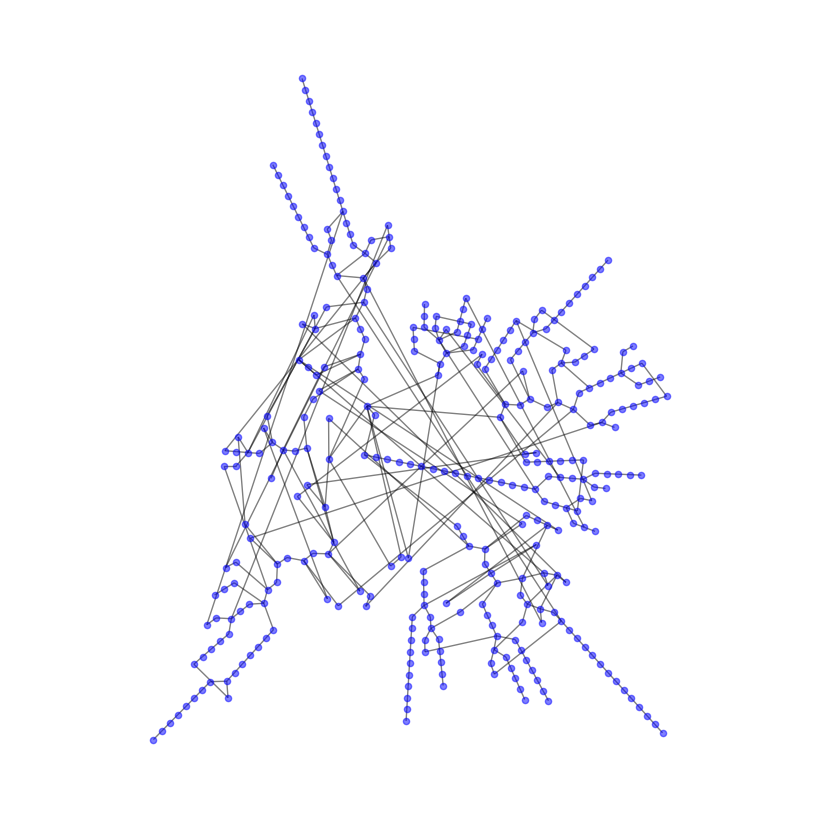

In [36]:
plt.figure(figsize=(8, 8))
nx.draw(city_G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.show()

In [37]:
# 换乘站列表，以列表形式展示
transfer_stations = df_city.groupby('st_poiid')['line_name'].nunique()
transfer_stations = transfer_stations[transfer_stations > 1]
transfer_stations = transfer_stations.reset_index().rename(columns={'line_name': 'line_count'})
transfer_stations_list = transfer_stations['st_poiid'].tolist()
transfer_stations_list


['BV09092777',
 'BV09313344',
 'BV10060978',
 'BV10060980',
 'BV10061045',
 'BV10061281',
 'BV10061673',
 'BV10062614',
 'BV10063208',
 'BV10063364',
 'BV10069259',
 'BV10069525',
 'BV10069526',
 'BV10069529',
 'BV10069530',
 'BV10069531',
 'BV10069534',
 'BV10069535',
 'BV10069540',
 'BV10536719',
 'BV10536720',
 'BV10536724',
 'BV10536726',
 'BV10536727',
 'BV10536733',
 'BV10536736',
 'BV10536741',
 'BV10536742',
 'BV10536749',
 'BV10536813',
 'BV10536818',
 'BV10549929',
 'BV10610173',
 'BV10610174',
 'BV10612463',
 'BV10655423',
 'BV10707801',
 'BV10707802',
 'BV10707805',
 'BV10707809',
 'BV10707820',
 'BV10707825',
 'BV10707827',
 'BV10707828',
 'BV10718662',
 'BV10738804',
 'BV10738812',
 'BV10770424',
 'BV10781533',
 'BV10781535',
 'BV10781537',
 'BV10831917',
 'BV10856174',
 'BV10860017',
 'BV10879928',
 'BV10879940',
 'BV10909938',
 'BV10959954',
 'BV10959956',
 'BV10996461',
 'BV11315884',
 'BV11424810',
 'BV11430585',
 'BV11471855']

In [38]:
transfer_stations_dict = {}
for i, row in transfer_stations.iterrows():
    transfer_stations_dict[row['st_poiid']] = row['line_count']
transfer_stations_dict

{'BV09092777': 2,
 'BV09313344': 3,
 'BV10060978': 2,
 'BV10060980': 2,
 'BV10061045': 2,
 'BV10061281': 3,
 'BV10061673': 2,
 'BV10062614': 2,
 'BV10063208': 2,
 'BV10063364': 2,
 'BV10069259': 3,
 'BV10069525': 2,
 'BV10069526': 2,
 'BV10069529': 2,
 'BV10069530': 2,
 'BV10069531': 2,
 'BV10069534': 2,
 'BV10069535': 2,
 'BV10069540': 2,
 'BV10536719': 3,
 'BV10536720': 2,
 'BV10536724': 2,
 'BV10536726': 2,
 'BV10536727': 2,
 'BV10536733': 2,
 'BV10536736': 2,
 'BV10536741': 2,
 'BV10536742': 2,
 'BV10536749': 2,
 'BV10536813': 2,
 'BV10536818': 2,
 'BV10549929': 2,
 'BV10610173': 2,
 'BV10610174': 2,
 'BV10612463': 2,
 'BV10655423': 3,
 'BV10707801': 2,
 'BV10707802': 2,
 'BV10707805': 2,
 'BV10707809': 2,
 'BV10707820': 2,
 'BV10707825': 2,
 'BV10707827': 2,
 'BV10707828': 2,
 'BV10718662': 2,
 'BV10738804': 2,
 'BV10738812': 2,
 'BV10770424': 2,
 'BV10781533': 2,
 'BV10781535': 2,
 'BV10781537': 2,
 'BV10831917': 2,
 'BV10856174': 2,
 'BV10860017': 2,
 'BV10879928': 2,
 'BV108799

In [39]:
nodes = []
for node_id, data in city_G.nodes(data=True):
    # label_show = True if node_degree[node_id] > 2 else False
    label_show = True
    # if show_label:
    #     if node_id in cast_node_degree_top10 or node_id in movie_node_degree_top10:
    #         label_show = True
    node = {
        'id': node_id,
        'x': float(pos[node_id][0]),
        'y': float(pos[node_id][1]),
        'name': df_city[df_city['st_poiid'] == node_id]['st_name'].values[0],
        'symbolSize': 1 if node_id not in transfer_stations_list else transfer_stations_dict[node_id],
        'category': df_city[df_city['st_poiid'] == node_id]['line_name'].values[0],
        'itemStyle': {
            "normal": {"color": df_city[df_city['st_poiid'] == node_id]['line_color'].values[0], 
                        "opacity": 0.8}
        },
        'label': {
            'show': label_show,
        }
    }
    nodes.append(node)
nodes

[{'id': 'BV10063180',
  'x': 1543.7,
  'y': 1095.3,
  'name': '高新',
  'symbolSize': 1,
  'category': '1号线',
  'itemStyle': {'normal': {'color': '2249A3', 'opacity': 0.8}},
  'label': {'show': True}},
 {'id': 'BV10061281',
  'x': 1160.0,
  'y': 1760.5,
  'name': '火车南站',
  'symbolSize': 3,
  'category': '1号线',
  'itemStyle': {'normal': {'color': '2249A3', 'opacity': 0.8}},
  'label': {'show': True}},
 {'id': 'BV10060982',
  'x': 1380.9,
  'y': 2257.9,
  'name': '桐梓林',
  'symbolSize': 1,
  'category': '1号线',
  'itemStyle': {'normal': {'color': '2249A3', 'opacity': 0.8}},
  'label': {'show': True}},
 {'id': 'BV10060980',
  'x': 1341.6,
  'y': 2318.3,
  'name': '倪家桥',
  'symbolSize': 2,
  'category': '1号线',
  'itemStyle': {'normal': {'color': '2249A3', 'opacity': 0.8}},
  'label': {'show': True}},
 {'id': 'BV10060963',
  'x': 1354.6,
  'y': 2570.3,
  'name': '锦江宾馆',
  'symbolSize': 1,
  'category': '1号线',
  'itemStyle': {'normal': {'color': '2249A3', 'opacity': 0.8}},
  'label': {'show': Tr

In [40]:
links = []
for i in city_G.edges(data=True):
    links.append({
        'source': i[0],
        'target': i[1],
    })
links

[{'source': 'BV10063180', 'target': 'BV10061281'},
 {'source': 'BV10063180', 'target': 'BV10069527'},
 {'source': 'BV10061281', 'target': 'BV10060982'},
 {'source': 'BV10061281', 'target': 'BV10959952'},
 {'source': 'BV10061281', 'target': 'BV10536742'},
 {'source': 'BV10061281', 'target': 'BV10069259'},
 {'source': 'BV10060982', 'target': 'BV10060980'},
 {'source': 'BV10060980', 'target': 'BV10060978'},
 {'source': 'BV10060980', 'target': 'BV10856185'},
 {'source': 'BV10060980', 'target': 'BV10856184'},
 {'source': 'BV10060963', 'target': 'BV10069526'},
 {'source': 'BV10060963', 'target': 'BV10060965'},
 {'source': 'BV10069526', 'target': 'BV10063364'},
 {'source': 'BV10069526', 'target': 'BV10061045'},
 {'source': 'BV10069526', 'target': 'BV10069531'},
 {'source': 'BV10069527', 'target': 'BV10069259'},
 {'source': 'BV10069525', 'target': 'BV10063082'},
 {'source': 'BV10069525', 'target': 'BV10061673'},
 {'source': 'BV10069525', 'target': 'BV10707827'},
 {'source': 'BV10069525', 'targ

In [41]:
# 构建图表
net_graph = Graph(init_opts=opts.InitOpts(width="1000px", height="1000px")).add(
        "",
        nodes=nodes,
        links=links,
        categories=categories,
        # layout="circular",
        layout="none",
        is_rotate_label=False,
        # linestyle_opts=opts.LineStyleOpts(color=report_color['line'], curve=0.1, opacity=0.4),
        label_opts=opts.LabelOpts(
            position="outside",  # 标签位置（会根据圆环自动调整）
            rotate=True,       # 标签旋转（沿圆环切线方向）
            color="auto", 
            # is_show=False,
            # distance=12,
            # font_size=14
            ),
        
    ).set_global_opts(
        title_opts=opts.TitleOpts(subtitle="* 为保证可视化效果，仅展示30部作品，及其主要演员。",  
                                  pos_bottom="20px", 
                                  pos_left="20px", 
                                #   subtitle_textstyle_opts=opts.TextStyleOpts(color=report_color['p'], font_size=16)),
    ))

# 获取图表 HTML 代码（不生成本地文件）
net_graph.render_notebook()

# 直径图
部分城市的地铁网络并非严格意义上的连通图。例如，长沙的磁悬浮机场线（S2 线）以及深圳的坪山云巴 1 号线均为独立线路，与城市主体地铁网并未形成连通。因此，在进行地铁网络建模与计算结构性指标时，通常需要基于最大连通子图进行分析，以避免孤立子图对平均最短路径、网络效率等指标造成干扰或失真。
本研究中将各类轨道交通线路统一统称为“地铁”。在若干城市的地铁系统中，整体网络并非严格意义上的单一连通图。例如，长沙的 S2 线（机场线）以及深圳的坪山云巴 1 号线均为独立运行线路，与城市主体地铁网络缺乏连接。若直接将这些孤立子网纳入整体网络建模，可能导致部分拓扑指标（如平均最短路径长度、全局效率等）产生偏差，从而影响对网络整体特性的准确刻画。因此，本研究在计算地铁网络的结构性指标时，统一基于最大连通子图进行分析，以确保所得结果能够更真实地反映城市地铁主体网络的结构特征与运行效率。
